In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')

df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

df.index

Index(['2016-05-19', '2016-05-26', '2016-05-27', '2016-05-28', '2016-05-29',
       '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-14', '2016-06-15',
       ...
       '2019-11-16', '2019-11-17', '2019-11-20', '2019-11-21', '2019-11-23',
       '2019-11-24', '2019-11-29', '2019-11-30', '2019-12-01', '2019-12-03'],
      dtype='object', name='date', length=1238)

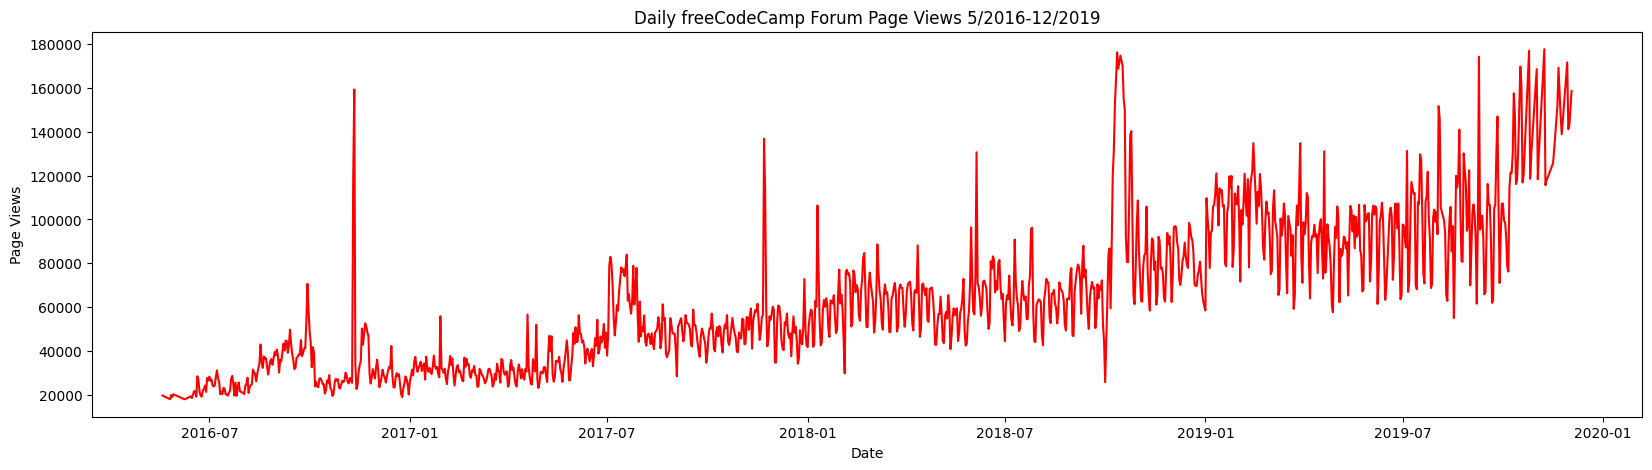

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import seaborn as sb

df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=['date'])

df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))]

fig, ax = plt.subplots(figsize=(20, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

dtFmt = dt.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(dtFmt)
ax.xaxis.set_major_locator(dt.MonthLocator(bymonth=[1,7]))

plt.plot(df, color='red')
plt.show()

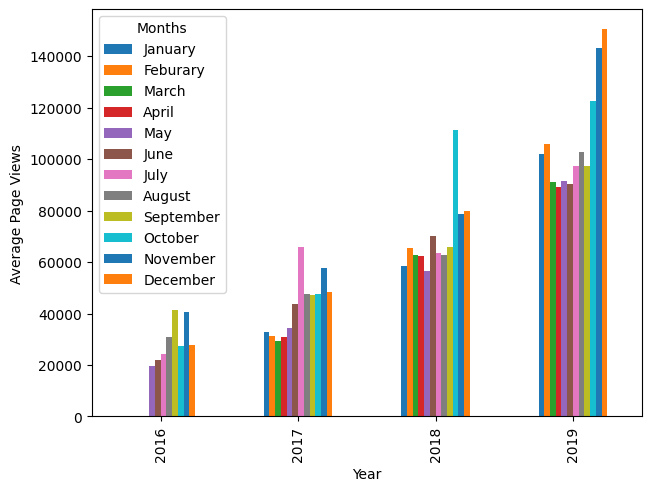

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')

df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

# df.index

df_bar = pd.DataFrame(pd.DataFrame({
    'Year': pd.to_datetime(df.index.values).year,
    'Month': pd.to_datetime(df.index.values).month,
    'Views': df['value']}).groupby([
        'Year',
        'Month'])['Views'].mean().round(0).astype(int))

df_bar.reset_index(inplace=True)

df_bar = df_bar.pivot(
    index='Year',
    columns='Month',
    values='Views')

fig, ax = plt.subplots(layout='constrained')
plt.ylabel('Average Page Views')

df_bar.plot.bar(ax=ax)
ax.legend(
    ['January', 'Feburary', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'],
     title='Months')

C:\Users\alain\AppData\Local\Temp\ipykernel_18664\1320632091.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\alain\AppData\Local\Temp\ipykernel_18664\1320632091.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\alain\AppData\Local\Temp\ipykernel_18664\1320632091.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  palette='Pastel1').set(


[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 (0.0, 200000.0),
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')]]

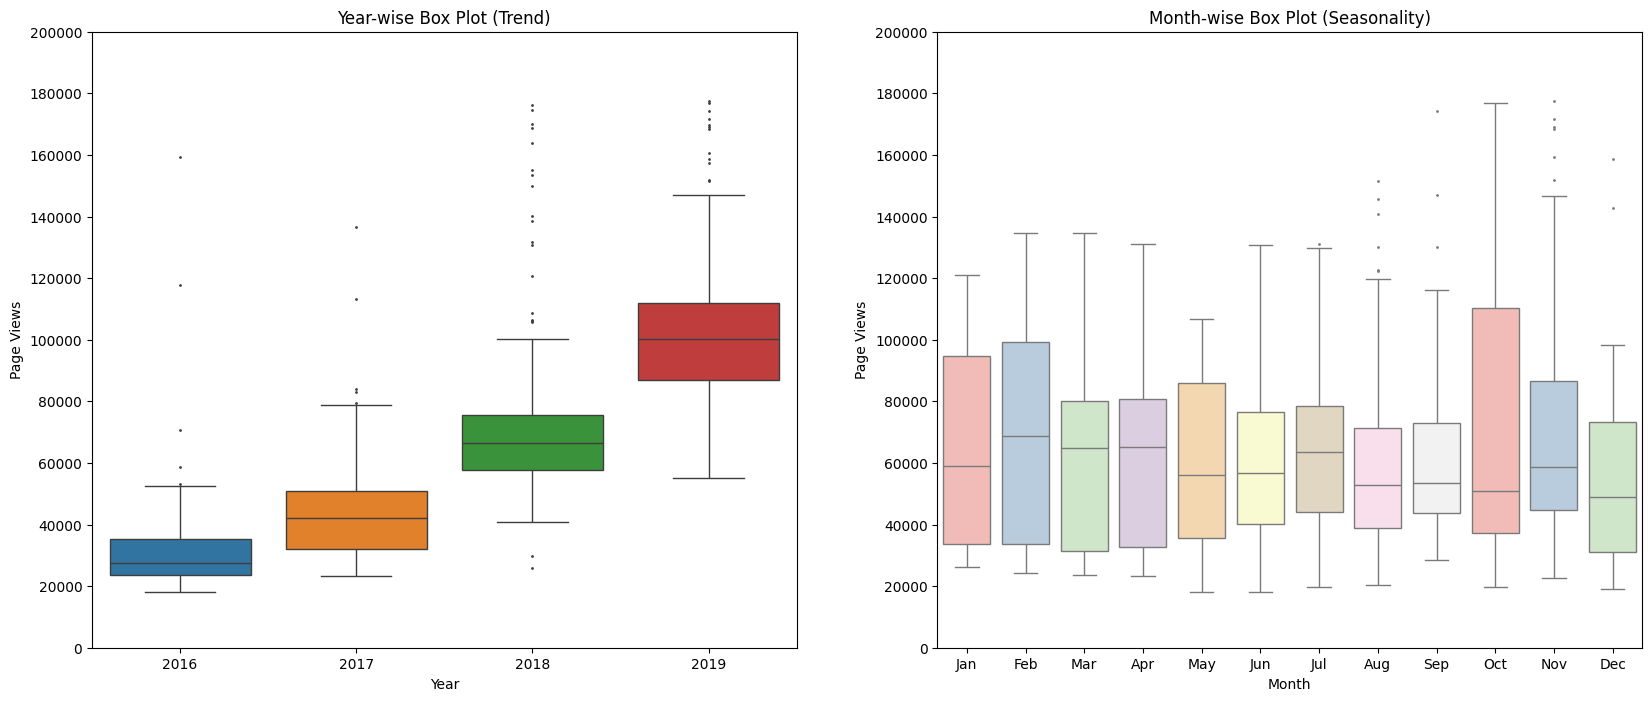

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# df_box = pd.DataFrame({
#     'Year': pd.to_datetime(df.index.values).year,
#     'Month': pd.to_datetime(df.index.values).strftime('%b'),
#     'Page Views': df['value']})

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
pv_ticks = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000]

sns.boxplot(
    x=pd.to_datetime(df.index.values).year,
    y=df['value'],
    fliersize=1,
    ax=ax[0],
    palette='tab10').set(
        title='Year-wise Box Plot (Trend)',
        xlabel='Year',
        ylabel='Page Views',
        ylim=(0, 200000),
        yticks=pv_ticks)

sns.boxplot(
    x=pd.to_datetime(df.index.values).month,
    y=df['value'],
    fliersize=1,
    ax=ax[1],
    palette='Pastel1').set(
        title='Month-wise Box Plot (Seasonality)',
        xlabel='Month',
        ylabel='Page Views',
        ylim=(0, 200000),
        yticks=pv_ticks,
        xticklabels=[
            'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

